In [3]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6dd4de488c4a18226464a9a9a4f779fa


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high= 90.000, size= 1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size= 1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
# Create an empty list to hold the weather data. 
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | katsiveli
City not found. Skipping...
Processing Record 6 of Set 1 | lepe
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | arman
Processing Record 9 of Set 1 | bulgan
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mareeba
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | viligili
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | erenhot
Processing Record 21 of Set 1 | lam

Processing Record 39 of Set 4 | ventspils
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | takoradi
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | gravdal
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | puerto del rosario
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | carutapera
Processing Record 50 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | norman
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | pedernales
Processing Record 8 of Set 5 | nogliki
Processing Record 9 of Set 5 | aras
Processing Record 10 of Set 5 | baykit
Processing Record 11 of Set 5 | sto

City not found. Skipping...
Processing Record 29 of Set 8 | dasoguz
Processing Record 30 of Set 8 | shingu
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | dogondoutchi
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | tabou
Processing Record 35 of Set 8 | wana
Processing Record 36 of Set 8 | havoysund
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | capao da canoa
Processing Record 39 of Set 8 | newport
Processing Record 40 of Set 8 | prince george
Processing Record 41 of Set 8 | kintampo
Processing Record 42 of Set 8 | pont-sainte-maxence
Processing Record 43 of Set 8 | murgab
Processing Record 44 of Set 8 | los llanos de aridane
Processing Record 45 of Set 8 | auki
Processing Record 46 of Set 8 | ginda
Processing Record 47 of Set 8 | falesti
Processing Record 48 of Set 8 | dingzhou
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | cah ab
City not found. Skipping...
Processing Record 1 of

Processing Record 16 of Set 12 | great yarmouth
Processing Record 17 of Set 12 | peterhead
Processing Record 18 of Set 12 | nizhniy odes
Processing Record 19 of Set 12 | rio grande
Processing Record 20 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 12 | chor
Processing Record 22 of Set 12 | tyukalinsk
Processing Record 23 of Set 12 | salta
Processing Record 24 of Set 12 | banmo
City not found. Skipping...
Processing Record 25 of Set 12 | mango
Processing Record 26 of Set 12 | kurilsk
Processing Record 27 of Set 12 | beringovskiy
Processing Record 28 of Set 12 | bardiyah
Processing Record 29 of Set 12 | rusape
Processing Record 30 of Set 12 | celestun
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | aventura
Processing Record 33 of Set 12 | bireun
Processing Record 34 of Set 12 | saint-georges
Processing Record 35 of Set 12 | sitapur
Processing Record 36 of Set 12 | warwick
Processing Record 37 of Set 12 | trincomalee
Proces

In [6]:
len(city_data)

584

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,75,40,11.50,AR,2022-09-25 00:10:42
1,Saint-Francois,46.4154,3.9054,54.84,88,100,5.75,FR,2022-09-25 00:10:43
2,Punta Arenas,-53.1500,-70.9167,41.11,56,75,16.11,CL,2022-09-25 00:10:43
3,Lepe,37.2548,-7.2043,68.11,58,59,14.92,ES,2022-09-25 00:10:44
4,Mataura,-46.1927,168.8643,56.88,65,100,7.27,NZ,2022-09-25 00:10:45
5,Arman,59.7000,150.1667,43.02,50,100,9.40,RU,2022-09-25 00:10:45
6,Bulgan,48.8125,103.5347,38.61,70,41,3.89,MN,2022-09-25 00:10:46
7,Dudinka,69.4058,86.1778,27.63,88,100,17.13,RU,2022-09-25 00:10:46
8,Clyde River,70.4692,-68.5914,30.47,78,100,11.23,CA,2022-09-25 00:10:47
9,Busselton,-33.6500,115.3333,56.64,76,93,6.20,AU,2022-09-25 00:10:48


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-09-25 00:10:42,-54.8000,-68.3000,38.86,75,40,11.50
1,Saint-Francois,FR,2022-09-25 00:10:43,46.4154,3.9054,54.84,88,100,5.75
2,Punta Arenas,CL,2022-09-25 00:10:43,-53.1500,-70.9167,41.11,56,75,16.11
3,Lepe,ES,2022-09-25 00:10:44,37.2548,-7.2043,68.11,58,59,14.92
4,Mataura,NZ,2022-09-25 00:10:45,-46.1927,168.8643,56.88,65,100,7.27


In [9]:
# Create the output file (CSV)
output_data_file= "weather_data/cities.csv"

#Export the City_data into a csv
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

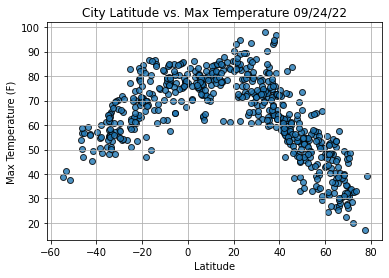

In [11]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

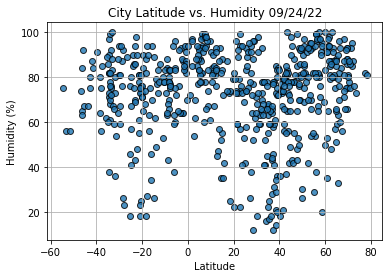

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

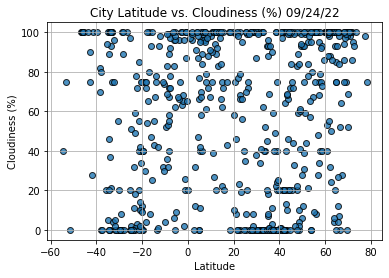

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

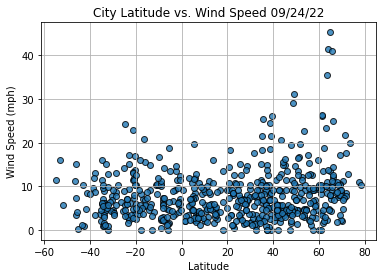

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress 

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept 
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                   Port Blair
Country                        IN
Date          2022-09-25 00:10:51
Lat                       11.6667
Lng                         92.75
Max Temp                    80.06
Humidity                       81
Cloudiness                     94
Wind Speed                   5.26
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
579    False
580    False
581    False
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Francois,FR,2022-09-25 00:10:43,46.4154,3.9054,54.84,88,100,5.75
3,Lepe,ES,2022-09-25 00:10:44,37.2548,-7.2043,68.11,58,59,14.92
5,Arman,RU,2022-09-25 00:10:45,59.7000,150.1667,43.02,50,100,9.40
6,Bulgan,MN,2022-09-25 00:10:46,48.8125,103.5347,38.61,70,41,3.89
7,Dudinka,RU,2022-09-25 00:10:46,69.4058,86.1778,27.63,88,100,17.13


In [35]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

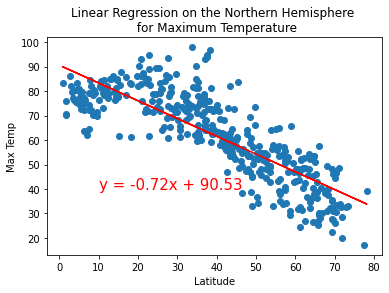

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))


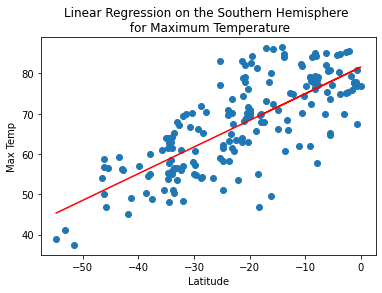

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

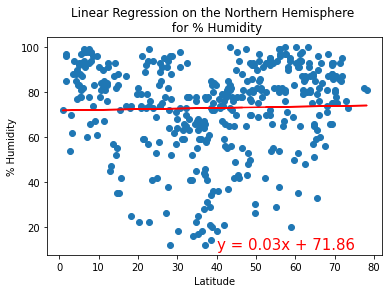

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))

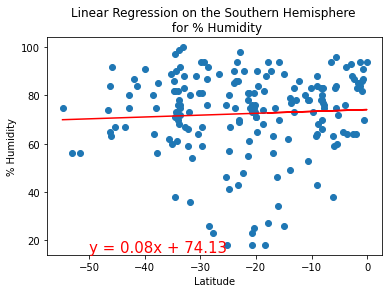

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

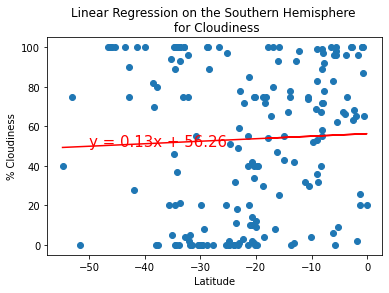

In [49]:
# Linear Regression on the southern hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Cloudiness',
                      '% Cloudiness', (-50, 50))

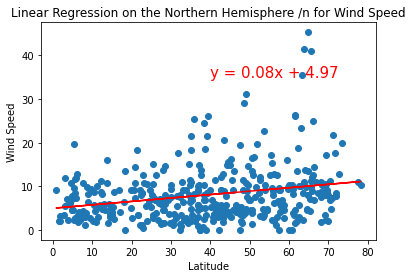

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere /n for Wind Speed',
                       'Wind Speed',(40,35))

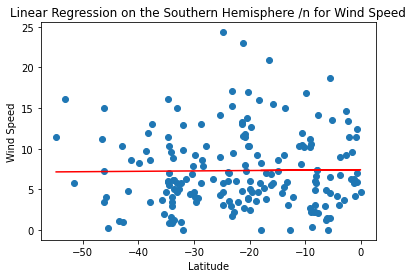

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere /n for Wind Speed',
                       'Wind Speed',(-50,35))